In [1]:
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

sns.set_style("whitegrid")

df = pd.read_csv(Path("C:/Users/gabriel.paoli/Github/trilha_IA/projeto-10-Data-science/diabetes.csv"))
df.shape

(768, 9)

In [2]:
df = df[(df["BloodPressure"] != 0) & (df["SkinThickness"] != 0) & (df["BMI"] != 0)]
df.shape

(537, 9)

In [3]:
df_train = df.sample(frac=0.7, random_state=1)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True)
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Outcome', axis=1)
X_valid = df_valid.drop('Outcome', axis=1)
y_train = df_train['Outcome']
y_valid = df_valid['Outcome']

In [4]:
model = keras.Sequential([
    layers.Dropout(rate=0.3),
    layers.Dense(100, activation='relu', input_shape=[8]),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=200,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.5172
Best Validation Accuracy: 0.7205


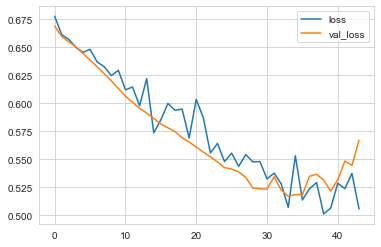

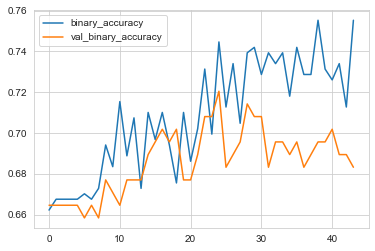

In [5]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))